### 1. Load History OHCLV 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [51]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('./')

file_path = '/usr/local/services/freqtrade-grid/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
print(len(coins))

393


### 2. Pair Filter

In [52]:
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]


top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

copy_all = [
"BTC/USDT:USDT","ETH/USDT:USDT","BNB/USDT:USDT","DOGE/USDT:USDT","SOL/USDT:USDT","XRP/USDT:USDT","1000PEPE/USDT:USDT","1000SHIB/USDT:USDT","AAVE/USDT:USDT","ADA/USDT:USDT","ARB/USDT:USDT","AVAX/USDT:USDT","ENA/USDT:USDT","ETC/USDT:USDT","FIL/USDT:USDT","LINK/USDT:USDT","LTC/USDT:USDT","NEAR/USDT:USDT","SEI/USDT:USDT","SUI/USDT:USDT","WLD/USDT:USDT","XLM/USDT:USDT","TRUMP/USDT:USDT","1000FLOKI/USDT:USDT","1000SATS/USDT:USDT","ACT/USDT:USDT","AERGO/USDT:USDT","APT/USDT:USDT","ATH/USDT:USDT","BABY/USDT:USDT","BANANAS31/USDT:USDT","BANANA/USDT:USDT","BANK/USDT:USDT","BCH/USDT:USDT","BROCCOLI714/USDT:USDT","BROCCOLIF3B/USDT:USDT","BR/USDT:USDT","BTCDOM/USDT:USDT","DEEP/USDT:USDT","DOT/USDT:USDT","EDU/USDT:USDT","EPT/USDT:USDT","FHE/USDT:USDT","FIS/USDT:USDT","FORM/USDT:USDT","FORTH/USDT:USDT","FUN/USDT:USDT","GRASS/USDT:USDT","GUN/USDT:USDT","HBAR/USDT:USDT","HIPPO/USDT:USDT","HMSTR/USDT:USDT","HYPER/USDT:USDT","ICP/USDT:USDT","INIT/USDT:USDT","IP/USDT:USDT","JELLYJELLY/USDT:USDT","JUP/USDT:USDT","KAITO/USDT:USDT","KERNEL/USDT:USDT","LDO/USDT:USDT","MAVIA/USDT:USDT","MEMEFI/USDT:USDT","MKR/USDT:USDT","MLN/USDT:USDT","NKN/USDT:USDT","OM/USDT:USDT","ONDO/USDT:USDT","ORDI/USDT:USDT","PARTI/USDT:USDT","PAXG/USDT:USDT","PERP/USDT:USDT","PLUME/USDT:USDT","PNUT/USDT:USDT","PROMPT/USDT:USDT","PUMP/USDT:USDT","RARE/USDT:USDT","REZ/USDT:USDT","RSR/USDT:USDT","SIREN/USDT:USDT","STO/USDT:USDT","TAO/USDT:USDT","TIA/USDT:USDT","TON/USDT:USDT","TRB/USDT:USDT","TRX/USDT:USDT","TUT/USDT:USDT","UNI/USDT:USDT","VOXEL/USDT:USDT","WAL/USDT:USDT","WCT/USDT:USDT","WIF/USDT:USDT","XCN/USDT:USDT","1000BONK/USDT:USDT","1000CHEEMS/USDT:USDT","1000RATS/USDT:USDT","ACH/USDT:USDT","AI16Z/USDT:USDT","ALCH/USDT:USDT","ALGO/USDT:USDT","APE/USDT:USDT","ARC/USDT:USDT","ARKM/USDT:USDT","AR/USDT:USDT","ATOM/USDT:USDT","AUCTION/USDT:USDT","AXS/USDT:USDT","BAN/USDT:USDT","BERA/USDT:USDT","BLUR/USDT:USDT","BOME/USDT:USDT","CAKE/USDT:USDT","CFX/USDT:USDT","CHZ/USDT:USDT","COW/USDT:USDT","CRV/USDT:USDT","DEXE/USDT:USDT","DOGS/USDT:USDT","DYDX/USDT:USDT","EIGEN/USDT:USDT","ENS/USDT:USDT","EOS/USDT:USDT","ETHFI/USDT:USDT","FARTCOIN/USDT:USDT","FET/USDT:USDT","GALA/USDT:USDT","GMT/USDT:USDT","GOAT/USDT:USDT","GRT/USDT:USDT","INJ/USDT:USDT","IO/USDT:USDT","JTO/USDT:USDT","KAVA/USDT:USDT","LAYER/USDT:USDT","MANA/USDT:USDT","MASK/USDT:USDT","MELANIA/USDT:USDT","ME/USDT:USDT","MOODENG/USDT:USDT","MOVE/USDT:USDT","NEIRO/USDT:USDT","NEIROETH/USDT:USDT","NOT/USDT:USDT","OP/USDT:USDT","PENDLE/USDT:USDT","PENGU/USDT:USDT","PEOPLE/USDT:USDT","POL/USDT:USDT","POPCAT/USDT:USDT","PYTH/USDT:USDT","RENDER/USDT:USDT","RUNE/USDT:USDT","SAND/USDT:USDT","SHELL/USDT:USDT","SOLV/USDT:USDT","STRK/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","SWARMS/USDT:USDT","THE/USDT:USDT","TST/USDT:USDT","TURBO/USDT:USDT","USDC/USDT:USDT","USUAL/USDT:USDT","VANA/USDT:USDT","VET/USDT:USDT","VIRTUAL/USDT:USDT","W/USDT:USDT","ZK/USDT:USDT","ZRO/USDT:USDT","1000000MOG/USDT:USDT","1000CAT/USDT:USDT","1000LUNC/USDT:USDT","1INCH/USDT:USDT","1MBABYDOGE/USDT:USDT","AEVO/USDT:USDT","AGLD/USDT:USDT","AIXBT/USDT:USDT","ALICE/USDT:USDT","ANIME/USDT:USDT","ANKR/USDT:USDT","ARK/USDT:USDT","AXL/USDT:USDT","BAKE/USDT:USDT","BAT/USDT:USDT","BB/USDT:USDT","BEAMX/USDT:USDT","BEL/USDT:USDT","BIGTIME/USDT:USDT","BIO/USDT:USDT","BMT/USDT:USDT","BSV/USDT:USDT","C98/USDT:USDT","CATI/USDT:USDT","CHILLGUY/USDT:USDT","COMP/USDT:USDT","COTI/USDT:USDT","CTSI/USDT:USDT","DASH/USDT:USDT","DENT/USDT:USDT","DF/USDT:USDT","DYM/USDT:USDT","EGLD/USDT:USDT","EPIC/USDT:USDT","FLM/USDT:USDT","FLOW/USDT:USDT","GAS/USDT:USDT","GLM/USDT:USDT","GPS/USDT:USDT","GRIFFAIN/USDT:USDT","GTC/USDT:USDT","HIFI/USDT:USDT","ID/USDT:USDT","IMX/USDT:USDT","IOTA/USDT:USDT","JASMY/USDT:USDT","KAS/USDT:USDT","KOMA/USDT:USDT","KSM/USDT:USDT","LISTA/USDT:USDT","LPT/USDT:USDT","LQTY/USDT:USDT","LUNA2/USDT:USDT","MANTA/USDT:USDT","MEME/USDT:USDT","METIS/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","MOCA/USDT:USDT","MORPHO/USDT:USDT","MUBARAK/USDT:USDT","NEO/USDT:USDT","ONE/USDT:USDT","POLYX/USDT:USDT","QNT/USDT:USDT","QUICK/USDT:USDT","RAYSOL/USDT:USDT","RED/USDT:USDT","ROSE/USDT:USDT","SAFE/USDT:USDT","SAGA/USDT:USDT","SCR/USDT:USDT","SFP/USDT:USDT","SNX/USDT:USDT","SPELL/USDT:USDT","SSV/USDT:USDT","STORJ/USDT:USDT","SUSHI/USDT:USDT","THETA/USDT:USDT","TNSR/USDT:USDT","TWT/USDT:USDT","UXLINK/USDT:USDT","VIC/USDT:USDT","VINE/USDT:USDT","VVV/USDT:USDT","XMR/USDT:USDT","XTZ/USDT:USDT","XVS/USDT:USDT","YFI/USDT:USDT","YGG/USDT:USDT","ZEC/USDT:USDT","ZEN/USDT:USDT","ZEREBRO/USDT:USDT","ZETA/USDT:USDT","ZIL/USDT:USDT","ZRX/USDT:USDT","1000WHY/USDT:USDT","1000XEC/USDT:USDT","1000X/USDT:USDT","ACE/USDT:USDT","ACX/USDT:USDT","AERO/USDT:USDT","AI/USDT:USDT","AKT/USDT:USDT","ALPACA/USDT:USDT","ALPHA/USDT:USDT","ALT/USDT:USDT","API3/USDT:USDT","ARPA/USDT:USDT","ASTR/USDT:USDT","ATA/USDT:USDT","AVAAI/USDT:USDT","AVA/USDT:USDT","B3/USDT:USDT","BAND/USDT:USDT","BICO/USDT:USDT","BID/USDT:USDT","BNT/USDT:USDT","BRETT/USDT:USDT","BSW/USDT:USDT","CELO/USDT:USDT","CELR/USDT:USDT","CETUS/USDT:USDT","CGPT/USDT:USDT","CHESS/USDT:USDT","CHR/USDT:USDT","CKB/USDT:USDT","COOKIE/USDT:USDT","COS/USDT:USDT","CYBER/USDT:USDT","DEFI/USDT:USDT","DEGEN/USDT:USDT","DEGO/USDT:USDT","DIA/USDT:USDT","DODOX/USDT:USDT","DRIFT/USDT:USDT","D/USDT:USDT","DUSK/USDT:USDT","ENJ/USDT:USDT","ETHW/USDT:USDT","FIDA/USDT:USDT","FIO/USDT:USDT","FLUX/USDT:USDT","FXS/USDT:USDT","GHST/USDT:USDT","GMX/USDT:USDT","G/USDT:USDT","HEI/USDT:USDT","HFT/USDT:USDT","HIGH/USDT:USDT","HIVE/USDT:USDT","HOOK/USDT:USDT","HOT/USDT:USDT","ICX/USDT:USDT","ILV/USDT:USDT","IOST/USDT:USDT","IOTX/USDT:USDT","JOE/USDT:USDT","KAIA/USDT:USDT","KDA/USDT:USDT","KMNO/USDT:USDT","KNC/USDT:USDT","LEVER/USDT:USDT","LOKA/USDT:USDT","LRC/USDT:USDT","LSK/USDT:USDT","LUMIA/USDT:USDT","MAGIC/USDT:USDT","MAV/USDT:USDT","MBOX/USDT:USDT","MOVR/USDT:USDT","MTL/USDT:USDT","MYRO/USDT:USDT","NFP/USDT:USDT","NMR/USDT:USDT","NTRN/USDT:USDT","OGN/USDT:USDT","OMNI/USDT:USDT","ONG/USDT:USDT","ONT/USDT:USDT","ORCA/USDT:USDT","OXT/USDT:USDT","PHA/USDT:USDT","PHB/USDT:USDT","PIPPIN/USDT:USDT","PIXEL/USDT:USDT","PONKE/USDT:USDT","PROM/USDT:USDT","PORTAL/USDT:USDT","POWR/USDT:USDT","QTUM/USDT:USDT","RDNT/USDT:USDT","REI/USDT:USDT","RIF/USDT:USDT","RLC/USDT:USDT","RONIN/USDT:USDT","RPL/USDT:USDT","RVN/USDT:USDT","SANTOS/USDT:USDT","SCRT/USDT:USDT","SKL/USDT:USDT","SLERF/USDT:USDT","SONIC/USDT:USDT","SPX/USDT:USDT","STEEM/USDT:USDT","STG/USDT:USDT","SUN/USDT:USDT","SUPER/USDT:USDT","SWELL/USDT:USDT","SXP/USDT:USDT","SYN/USDT:USDT","SYS/USDT:USDT","TLM/USDT:USDT","TOKEN/USDT:USDT","TRU/USDT:USDT","T/USDT:USDT","UMA/USDT:USDT","USTC/USDT:USDT","VANRY/USDT:USDT","VELODROME/USDT:USDT","VTHO/USDT:USDT","WAXP/USDT:USDT","WOO/USDT:USDT","XAI/USDT:USDT","XVG/USDT:USDT"
]


import random
random200 = random.sample(coins, 200)

target_coins = top200

print(len(target_coins))

145


### 3. Load History OHLCV 

In [53]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)
print(len(coins))

139


### 3. History Data Transform

In [54]:
import pandas as pd
close_dfs = []
open_dfs = []
high_dfs = []
low_dfs = []
volume_dfs = []


for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)



    temp_df = df[['date', 'open']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    open_dfs.append(temp_df)


    temp_df = df[['date', 'high']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    high_dfs.append(temp_df)
    

    temp_df = df[['date', 'low']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    low_dfs.append(temp_df)

    temp_df = df[['date', 'volume']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    volume_dfs.append(temp_df)



close = pd.concat(close_dfs, axis=1)
open = pd.concat(open_dfs, axis=1)
high = pd.concat(high_dfs, axis=1)
low = pd.concat(low_dfs, axis=1)
volume = pd.concat(volume_dfs, axis=1)
amount = close.mul(volume, fill_value=1)
vwap = (high + low + close + open) / 4
return_ = close.rolling(2).apply(lambda x: x.iloc[-1] / x.iloc[0]) - 1


### 4. OHLCV Filter

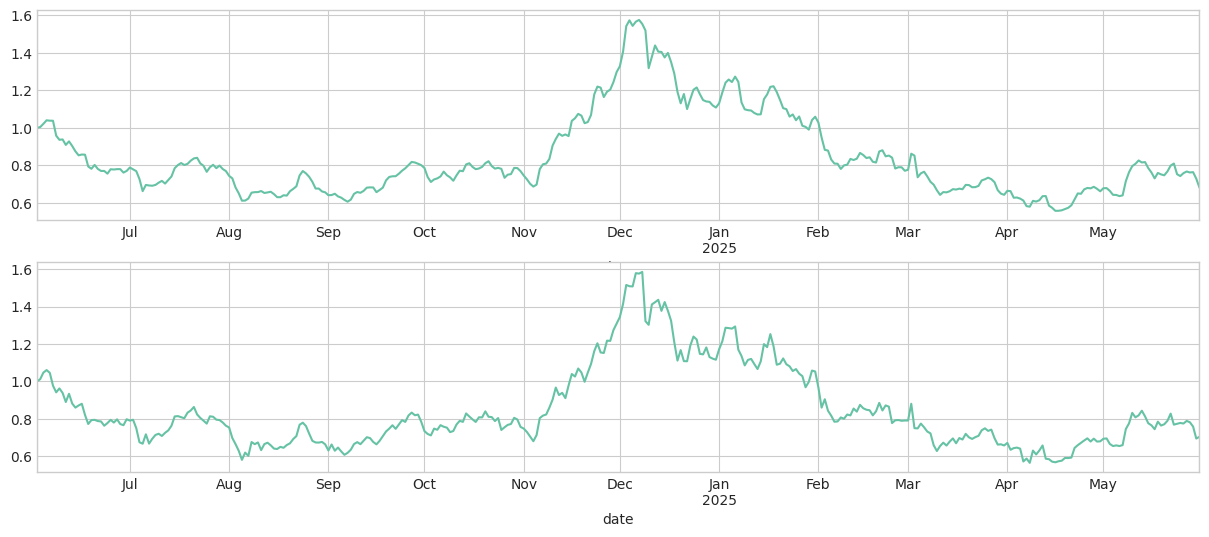

In [55]:
start_time = '2024-06-01'
end_time = '2025-06-01'
close_filter = close[(close.index > start_time) & (close.index < end_time)]
open_filter = open[(open.index > start_time) & (open.index < end_time)]
high_filter = high[(high.index > start_time) & (high.index < end_time)]
low_filter = low[(low.index > start_time) & (low.index < end_time)]
volume_filter = volume[(volume.index > start_time) & (volume.index < end_time)]
amount_filter = amount[(amount.index > start_time) & (amount.index < end_time)]
vwap_filter = vwap[(vwap.index > start_time) & (vwap.index < end_time)]
return_filter = return_[(return_.index > start_time) & (return_.index < end_time)]

benchmark_open_filter = open_filter.mean(axis=1)
benchmark_close_filter = close_filter.mean(axis=1)
volatility = return_filter.rolling(window=10, min_periods=5).std()


import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
high_norm = high_filter/high_filter.bfill().iloc[0] 
close_norm = close_filter/close_filter.bfill().iloc[0] 
high_norm.mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
close_norm.mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True);

### 5. Define Factor

In [56]:
import Alpha101 as alpha101

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
}

alpha_all_in_one_101 = alpha101.Alphas101(df_data)


import Alpha191 as alpha191

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
    'vwap' : vwap_filter,
    'amount': amount_filter,
    'benchmark_open': benchmark_open_filter,
    'benchmark_close': benchmark_close_filter
}

alpha_all_in_one_191 = alpha191.Alphas191(df_data)

### 6. AlphaLens Data Adaptor

In [57]:
method = getattr(alpha_all_in_one_101, 'alpha031')
single_alpha = method() 
single_alpha = single_alpha.dropna()
single_alpha

,KAS/USDT:USDT,AVAX/USDT:USDT,QTUM/USDT:USDT,DASH/USDT:USDT,CHZ/USDT:USDT,FLOW/USDT:USDT,MINA/USDT:USDT,LTC/USDT:USDT,AAVE/USDT:USDT,STX/USDT:USDT,...,BERA/USDT:USDT,ALGO/USDT:USDT,TAO/USDT:USDT,APE/USDT:USDT,AXL/USDT:USDT,PENDLE/USDT:USDT,TRX/USDT:USDT,PYTH/USDT:USDT,BLUR/USDT:USDT,SFP/USDT:USDT
date,,,,,,,,,,,,,,,,,,,,,
2025-05-11 00:00:00+00:00,2.359712,1.417266,1.784173,1.381295,2.654676,2.287770,2.323741,1.115108,1.064748,2.136691,...,1.884892,2.661871,-0.935252,-0.057554,2.258993,1.568345,2.359712,2.417266,2.690647,1.985612
2025-05-12 00:00:00+00:00,2.374101,1.273381,1.705036,1.323741,2.633094,2.194245,2.172662,1.100719,1.050360,1.913669,...,1.784173,2.510791,-0.949640,1.964029,2.366906,2.223022,2.280576,2.640288,2.582734,2.014388
2025-05-13 00:00:00+00:00,2.071942,2.014388,2.000000,1.258993,2.345324,2.007194,2.093525,2.028777,1.050360,2.223022,...,2.330935,2.453237,-0.007194,1.784173,2.410072,1.453237,2.086331,2.338129,2.309353,2.158273
2025-05-14 00:00:00+00:00,2.064748,1.273381,2.079137,1.309353,2.316547,2.294964,2.374101,1.129496,1.043165,2.244604,...,2.280576,2.330935,-0.007194,1.798561,2.330935,1.359712,2.021583,2.302158,2.230216,2.100719
2025-05-15 00:00:00+00:00,1.884892,2.028777,2.064748,2.071942,2.093525,2.071942,2.115108,2.021583,1.057554,2.086331,...,2.143885,2.079137,0.014388,2.021583,2.086331,1.273381,1.863309,2.107914,2.151079,1.992806
2025-05-16 00:00:00+00:00,1.942446,2.007194,2.000000,2.035971,2.050360,2.035971,2.043165,1.985612,1.978417,2.021583,...,2.093525,2.035971,0.007194,1.992806,2.035971,1.877698,1.812950,2.057554,2.086331,1.920863
2025-05-17 00:00:00+00:00,1.942446,2.007194,1.985612,2.028777,2.043165,1.992806,2.000000,2.007194,1.992806,2.100719,...,2.122302,2.007194,0.007194,1.870504,2.057554,1.956835,1.899281,2.043165,2.050360,1.884892
2025-05-18 00:00:00+00:00,2.402878,2.071942,2.323741,1.215827,2.294964,2.366906,2.172662,1.100719,1.064748,2.035971,...,2.366906,2.086331,0.014388,1.640288,2.143885,1.352518,2.417266,2.453237,2.453237,1.877698
2025-05-19 00:00:00+00:00,2.230216,2.136691,2.381295,1.546763,2.273381,0.237410,2.079137,2.093525,1.043165,2.446043,...,2.395683,2.129496,0.086331,1.446043,2.388489,1.158273,2.129496,0.446043,2.280576,0.208633


In [58]:
return_filter = return_filter.dropna()
return_filter

,KAS/USDT:USDT,AVAX/USDT:USDT,QTUM/USDT:USDT,DASH/USDT:USDT,CHZ/USDT:USDT,FLOW/USDT:USDT,MINA/USDT:USDT,LTC/USDT:USDT,AAVE/USDT:USDT,STX/USDT:USDT,...,BERA/USDT:USDT,ALGO/USDT:USDT,TAO/USDT:USDT,APE/USDT:USDT,AXL/USDT:USDT,PENDLE/USDT:USDT,TRX/USDT:USDT,PYTH/USDT:USDT,BLUR/USDT:USDT,SFP/USDT:USDT
date,,,,,,,,,,,,,,,,,,,,,
2025-04-23 00:00:00+00:00,-0.037101,0.010089,0.003146,0.012658,0.016300,0.007653,0.021277,-0.002876,0.062619,-0.046101,...,-0.011450,0.019570,-0.006093,0.041996,0.027856,-0.055054,-0.008420,0.026365,0.014785,0.020052
2025-04-24 00:00:00+00:00,0.027507,0.001926,0.004032,-0.009821,0.006318,0.017722,0.023750,0.012498,-0.001012,0.120823,...,-0.005516,0.055712,0.063867,0.012461,0.094397,0.051618,-0.003413,0.050788,0.008124,0.002336
2025-04-25 00:00:00+00:00,0.057014,-0.009701,0.022311,0.007665,0.019078,0.009950,0.021571,0.023620,-0.008580,-0.002638,...,0.041320,0.008869,-0.011945,0.013462,-0.006400,0.035722,-0.014635,0.015676,-0.011912,0.004272
2025-04-26 00:00:00+00:00,-0.026486,0.011105,-0.005674,0.009843,0.016351,0.004926,0.007171,0.008813,0.038945,-0.021617,...,-0.000266,0.004396,-0.012373,0.049905,0.047326,-0.028474,0.042613,0.003246,0.018172,0.021075
2025-04-27 00:00:00+00:00,-0.037037,-0.031208,-0.043459,-0.056269,-0.045465,-0.036765,-0.054984,-0.019195,-0.036906,-0.012222,...,-0.030634,-0.031947,0.033397,-0.069763,-0.053743,-0.045800,-0.027301,-0.063488,-0.053282,-0.020072
2025-04-28 00:00:00+00:00,-0.010415,0.006037,0.018816,0.105634,0.034196,0.035623,0.018418,0.003399,-0.001982,0.010946,...,0.010442,0.042043,0.048519,0.056344,0.041537,0.022498,0.012687,0.043674,0.021427,0.038261
2025-04-29 00:00:00+00:00,-0.082943,-0.012964,-0.019369,-0.019533,-0.038734,-0.017199,-0.024661,-0.001285,-0.004092,-0.030717,...,0.007615,-0.018221,-0.031563,-0.036601,0.049647,-0.014768,-0.018248,-0.050590,-0.025119,-0.018425
2025-04-30 00:00:00+00:00,0.019089,-0.030074,-0.016077,0.016890,0.011548,0.005000,-0.009692,-0.023740,-0.008339,-0.012020,...,-0.042645,-0.028281,-0.030215,0.013746,-0.020419,0.035306,0.010997,-0.025130,-0.014777,0.000190
2025-05-01 00:00:00+00:00,0.049058,0.034786,0.028478,-0.015332,0.034734,0.012438,0.026383,0.063848,0.053504,0.025194,...,-0.014378,-0.012278,0.007719,0.012618,0.027968,0.021426,-0.007630,0.035630,0.031965,0.013270


In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("Set2")

returns_df = return_filter
factors_df = single_alpha

returns_df.index = pd.to_datetime(returns_df.index)
factors_df.index = pd.to_datetime(factors_df.index)

# 找出两个数据集的共同日期
common_dates = returns_df.index.intersection(factors_df.index)
common_dates

returns_df = returns_df.loc[common_dates]
factors_df = factors_df.loc[common_dates]

In [70]:
factor_names = ['alpha']
factor_returns = pd.DataFrame(index=returns_df.index, columns=factor_names)
t_stats = pd.DataFrame(index=returns_df.index, columns=factor_names)
r_squared = pd.Series(index=returns_df.index, dtype=float)

In [66]:
returns_df

,KAS/USDT:USDT,AVAX/USDT:USDT,QTUM/USDT:USDT,DASH/USDT:USDT,CHZ/USDT:USDT,FLOW/USDT:USDT,MINA/USDT:USDT,LTC/USDT:USDT,AAVE/USDT:USDT,STX/USDT:USDT,...,BERA/USDT:USDT,ALGO/USDT:USDT,TAO/USDT:USDT,APE/USDT:USDT,AXL/USDT:USDT,PENDLE/USDT:USDT,TRX/USDT:USDT,PYTH/USDT:USDT,BLUR/USDT:USDT,SFP/USDT:USDT
date,,,,,,,,,,,,,,,,,,,,,
2025-05-11 00:00:00+00:00,0.065069,-0.040062,-0.031514,-0.025000,-0.026332,-0.017316,-0.004444,-0.048940,-0.032392,-0.044810,...,-0.014585,-0.054086,-0.012598,-0.031040,-0.082632,-0.044890,-0.003644,-0.042361,-0.060419,-0.035315
2025-05-12 00:00:00+00:00,-0.009969,0.001937,0.013095,0.009768,0.011650,0.002203,-0.006181,0.037370,0.003438,-0.010225,...,-0.076318,0.009599,-0.005060,0.018888,0.004347,-0.018672,0.024660,0.015959,0.041012,0.014814
2025-05-13 00:00:00+00:00,0.074447,0.035691,0.016060,0.035067,0.021386,0.028571,0.023151,-0.004334,0.065191,0.014179,...,0.021783,0.021496,0.012604,0.041525,0.019957,0.094587,-0.003606,0.009752,0.025971,0.014094
2025-05-14 00:00:00+00:00,-0.035886,-0.029677,-0.039322,-0.036215,-0.038252,-0.044872,-0.057413,-0.023798,-0.028992,-0.061314,...,-0.062485,-0.042088,-0.014374,-0.054108,-0.049741,0.003243,0.014071,-0.048027,-0.060363,-0.030609
2025-05-15 00:00:00+00:00,-0.024344,-0.058203,-0.041734,-0.043636,-0.065104,-0.044743,-0.065926,-0.016847,-0.024758,-0.056277,...,-0.096707,-0.046895,-0.041334,-0.062923,-0.038948,-0.028854,-0.004917,-0.095306,-0.067971,-0.026284
2025-05-16 00:00:00+00:00,0.004598,-0.019068,-0.010888,-0.011829,-0.010300,-0.021077,-0.023015,0.001915,0.031689,-0.010935,...,-0.060185,-0.011968,-0.025728,-0.020241,-0.019618,-0.021684,-0.006441,-0.041338,-0.026859,0.010167
2025-05-17 00:00:00+00:00,-0.077393,-0.038270,-0.032176,-0.023087,-0.037104,-0.033493,-0.030232,-0.034205,-0.038037,-0.036927,...,-0.052032,-0.032750,-0.004562,0.008362,-0.027383,-0.024141,-0.007404,-0.048558,-0.036922,-0.023772
2025-05-18 00:00:00+00:00,0.031606,0.039522,0.026247,0.044639,0.060385,0.032178,0.053846,0.050938,0.044675,0.051006,...,0.053914,0.054267,0.004488,0.105203,0.051164,0.071727,-0.006012,0.035287,0.041943,0.035194
2025-05-19 00:00:00+00:00,-0.038653,-0.034591,-0.037511,-0.020109,-0.033016,-0.031175,-0.039570,-0.026365,0.067724,-0.035244,...,-0.037904,-0.023317,-0.034570,-0.044726,-0.046098,-0.010333,-0.004779,-0.117787,-0.040437,-0.036401


In [75]:
 for date in tqdm(returns_df.index, desc="Processing dates"):
    # 获取当日的因子值和次日的收益率
    X = factors_df.loc[date].T  
    y = returns_df.loc[date]   
    X = (X - X.mean()) / X.std()
    # X = sm.add_constant(X)

    # 运行OLS回归
    model = sm.OLS(y, X, missing='drop').fit()
    print(model.params)
    # r_squared.loc[date] = model.rsquared


Processing dates: 100%|██████████| 21/21 [00:00<00:00, 690.22it/s]

2025-05-11 00:00:00+00:00   -0.004077
dtype: float64
2025-05-12 00:00:00+00:00   -0.001656
dtype: float64
2025-05-13 00:00:00+00:00   -0.001415
dtype: float64
2025-05-14 00:00:00+00:00   -0.005458
dtype: float64
2025-05-15 00:00:00+00:00   -0.0106
dtype: float64
2025-05-16 00:00:00+00:00    0.001298
dtype: float64
2025-05-17 00:00:00+00:00   -0.003193
dtype: float64
2025-05-18 00:00:00+00:00   -0.002743
dtype: float64
2025-05-19 00:00:00+00:00   -0.001872
dtype: float64
2025-05-20 00:00:00+00:00    0.000981
dtype: float64
2025-05-21 00:00:00+00:00   -0.000451
dtype: float64
2025-05-22 00:00:00+00:00    0.003055
dtype: float64
2025-05-23 00:00:00+00:00   -0.001614
dtype: float64
2025-05-24 00:00:00+00:00   -0.001484
dtype: float64
2025-05-25 00:00:00+00:00   -0.000682
dtype: float64
2025-05-26 00:00:00+00:00   -0.001246
dtype: float64
2025-05-27 00:00:00+00:00   -0.005057
dtype: float64
2025-05-28 00:00:00+00:00   -0.002503
dtype: float64
2025-05-29 00:00:00+00:00   -0.004069
dtype: flo

In [73]:
model.params

const                        0.015399
2025-05-31 00:00:00+00:00    0.002189
dtype: float64

In [68]:
r_squared

date
2025-05-11 00:00:00+00:00    0.004036
2025-05-12 00:00:00+00:00    0.001265
2025-05-13 00:00:00+00:00    0.000998
2025-05-14 00:00:00+00:00    0.024643
2025-05-15 00:00:00+00:00    0.073634
2025-05-16 00:00:00+00:00    0.002689
2025-05-17 00:00:00+00:00    0.020737
2025-05-18 00:00:00+00:00    0.002776
2025-05-19 00:00:00+00:00    0.004953
2025-05-20 00:00:00+00:00    0.001579
2025-05-21 00:00:00+00:00    0.000226
2025-05-22 00:00:00+00:00    0.004223
2025-05-23 00:00:00+00:00    0.002042
2025-05-24 00:00:00+00:00    0.006486
2025-05-25 00:00:00+00:00    0.001385
2025-05-26 00:00:00+00:00    0.002028
2025-05-27 00:00:00+00:00    0.027602
2025-05-28 00:00:00+00:00    0.006025
2025-05-29 00:00:00+00:00    0.019056
2025-05-30 00:00:00+00:00    0.022168
2025-05-31 00:00:00+00:00    0.004938
Freq: D, dtype: float64